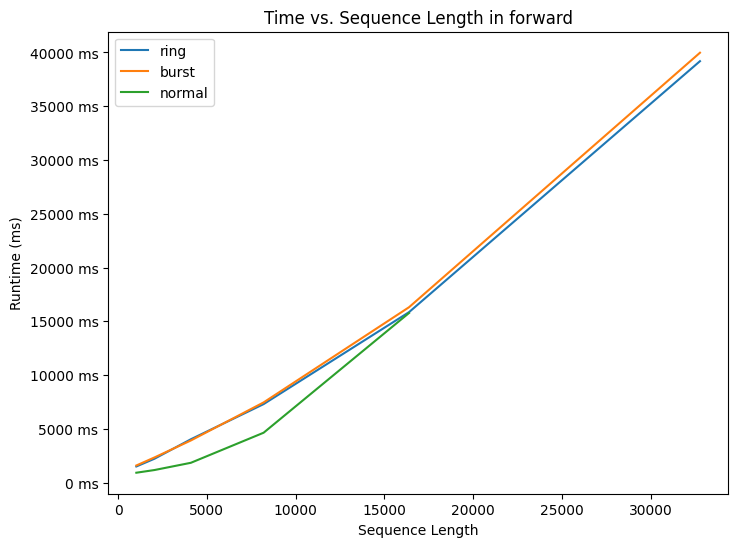

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
directory_path = "./"
file_paths = glob.glob(os.path.join(directory_path, "*.txt"))
file_paths = list(filter(lambda x:"backward" not in x,file_paths))
file_paths= sorted(file_paths,key=lambda x:int(x.split("_")[1].strip(".txt")))
x_values = {"ring": [], "burst": [], "normal": []}
y_values = {"ring": [], "burst": [], "normal": []}
memory = {"ring": [], "burst": [], "normal": []}
for file_path in file_paths:
    with open(file_path, "r") as f:
        lines = f.readlines()
        suffix = os.path.splitext(os.path.basename(file_path))[0].split("_")[-1]  # assuming the suffix is the last part of the filename before the extension
        prefix = os.path.splitext(os.path.basename(file_path))[0].split("_")[0]
        if "CUDA out of memory" in "\n".join(lines):
            # print(prefix,suffix," experiment faild because of OOM")
            memory[prefix].append(np.nan)
        else:
            speed_line = lines[-2]
            runtime = speed_line.split(":")[-1].strip()  # assuming the runtime is the last value after a colon
            memory_line = lines[-1]
            memory_num = memory_line.split(":")[-1].strip(" MiB\n")
            y_values[prefix].append(float(runtime.split()[0]))
            memory[prefix].append(int(memory_num))
            x_values[prefix].append(int(suffix))
plt.figure(figsize=(8,6))
plt.plot(x_values["ring"], y_values["ring"], label="ring")
plt.plot(x_values["burst"], y_values["burst"], label="burst")
plt.plot(x_values["normal"], y_values["normal"], label="normal")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)} ms"))

plt.xlabel("Sequence Length")
plt.ylabel("Runtime (ms)")
op = "forward"
title = f"Time vs. Sequence Length in {op}"
plt.title(title)
plt.legend()
plt.show()

In [15]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
df = pd.DataFrame()
df['ring'] = y_values['ring']
df['burst'] = y_values['burst']
df['normal'] = pd.Series(y_values['normal'])
df['x'] = x_values['burst']
df.set_index('x',inplace=True)
df/100
# df

,ring,burst,normal
x,,,
1024,14.97,15.90,9.16
2048,22.19,23.39,11.67
4096,40.28,39.16,18.40
8192,72.97,74.55,46.36
16384,158.52,163.09,157.73
32768,391.87,399.74,NaN


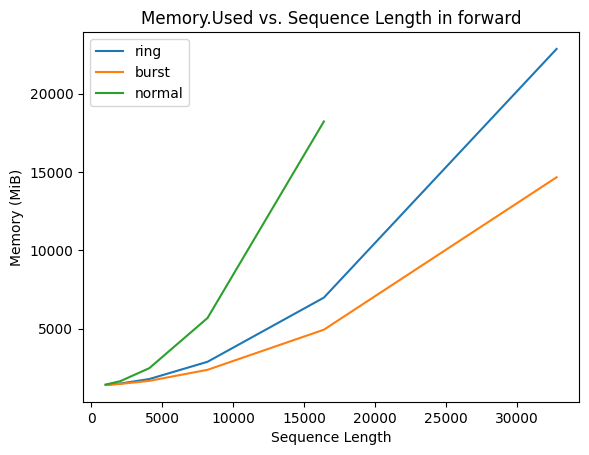

,ring,burst,normal
x,,,
1024,1410,1410,1432.0
2048,1498,1474,1648.0
4096,1786,1670,2480.0
8192,2886,2374,5680.0
16384,6982,4934,18224.0
32768,22854,14664,NaN


In [3]:
import pandas as pd

df = pd.DataFrame(memory)
df['x'] = x_values['burst']
df.set_index('x',inplace=True)
df.plot()
plt.xlabel("Sequence Length")
plt.ylabel("Memory (MiB)")
op = "forward"
title = f"Memory.Used vs. Sequence Length in {op}"
plt.title(title)
plt.legend()
plt.show()
df

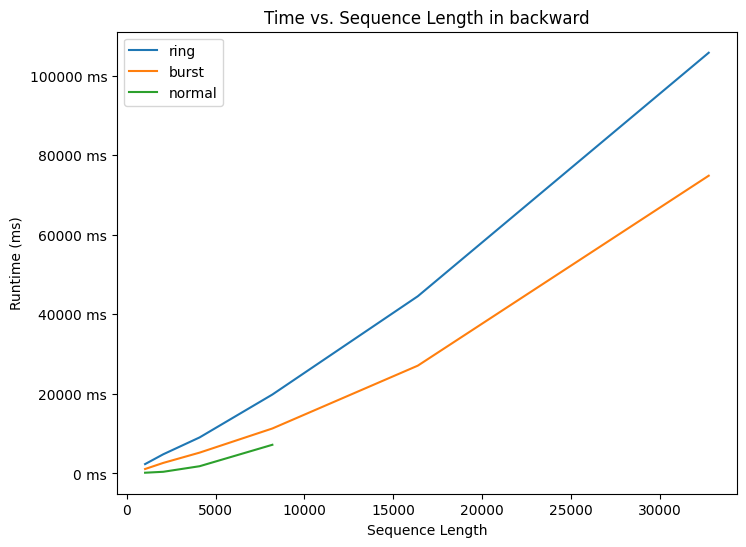

In [12]:
import os
import glob
import matplotlib.pyplot as plt

directory_path = "./"
file_paths = glob.glob(os.path.join(directory_path, "*backward.txt"))
file_paths= sorted(file_paths,key=lambda x:int(x.split("_")[1]))
x_backward = {"ring": [], "burst": [], "normal": []}
y_backward = {"ring": [], "burst": [], "normal": []}
memory_backward = {"ring": [], "burst": [], "normal": []}
for file_path in file_paths:
    backward=file_path.endswith("backward.txt")
    if not backward:
        continue
    with open(file_path, "r") as f:
        lines = f.readlines()
        suffix = os.path.splitext(os.path.basename(file_path))[0].split("_")[-2]  # assuming the suffix is the last part of the filename before the extension
        prefix = os.path.splitext(os.path.basename(file_path))[0].split("_")[0]
        if "CUDA out of memory" in "\n".join(lines):
            # print(prefix,suffix," experiment faild because of OOM")
            memory_backward[prefix].append(np.nan)
        else:
            speed_line = lines[-2]
            runtime = speed_line.split(":")[-1].strip()  # assuming the runtime is the last value after a colon
            memory_line = lines[-1]
            memory_num = memory_line.split(":")[-1].strip(" MiB\n")
            x_backward[prefix].append(int(suffix))
            y_backward[prefix].append(float(runtime.split()[0]) - y_values[prefix][len(x_backward[prefix]) - 1])
            memory_backward[prefix].append(int(memory_num))
plt.figure(figsize=(8,6))
plt.plot(x_backward["ring"], y_backward["ring"], label="ring")
plt.plot(x_backward["burst"], y_backward["burst"], label="burst")
plt.plot(x_backward["normal"], y_backward["normal"], label="normal")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)} ms"))

plt.xlabel("Sequence Length")
plt.ylabel("Runtime (ms)")
op = "backward"
title = f"Time vs. Sequence Length in {op}"
plt.title(title)
plt.legend()
plt.show()

In [16]:
import pandas as pd
df = pd.DataFrame()
df['ring'] = y_backward['ring']
df['burst'] = y_backward['burst']
df['normal'] = pd.Series(y_backward['normal'])
df['x'] = x_backward['burst']
df.set_index('x',inplace=True)
df/100

,ring,burst,normal
x,,,
1024,23.42,11.06,1.73
2048,48.13,26.42,4.10
4096,90.55,52.29,18.11
8192,198.33,112.98,72.00
16384,445.55,271.00,NaN
32768,1057.94,748.68,NaN


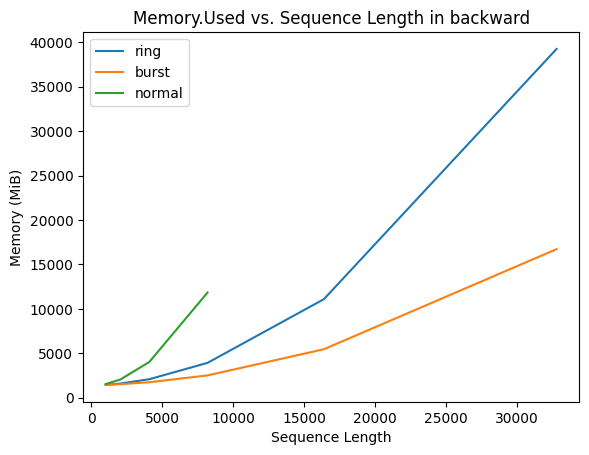

,ring,burst,normal
x,,,
1024,1438,1438,1536.0
2048,1590,1518,2040.0
4096,2082,1742,4024.0
8192,3918,2510,11832.0
16384,11086,5454,NaN
32768,39246,16720,NaN


In [6]:
import pandas as pd

df = pd.DataFrame(memory_backward)
df['x'] = x_values['burst']
df.set_index('x',inplace=True)
df.plot()
plt.xlabel("Sequence Length")
plt.ylabel("Memory (MiB)")
op = "backward"
title = f"Memory.Used vs. Sequence Length in {op}"
plt.title(title)
plt.legend()
plt.show()
df

In [19]:
output.decode("utf-8")

'0 MiB\n0 MiB\n0 MiB\n0 MiB\n'